In [1]:
!git clone https://github.com/nicknochnack/ImageClassification.git

Cloning into 'ImageClassification'...
remote: Enumerating objects: 312, done.
remote: Total 312 (delta 0), reused 0 (delta 0), pack-reused 312 (from 1)
Receiving objects: 100% (312/312), 106.29 MiB | 14.43 MiB/s, done.


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow
import os

In [8]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tensorflow.config.experimental.set_memory_growth(gpu, True)

In [9]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
import cv2
import imghdr

<ipython-input-10-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
data_dir = 'ImageClassification/data'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
from tensorflow import keras
data = tensorflow.keras.utils.image_dataset_from_directory('ImageClassification/data')

Found 305 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

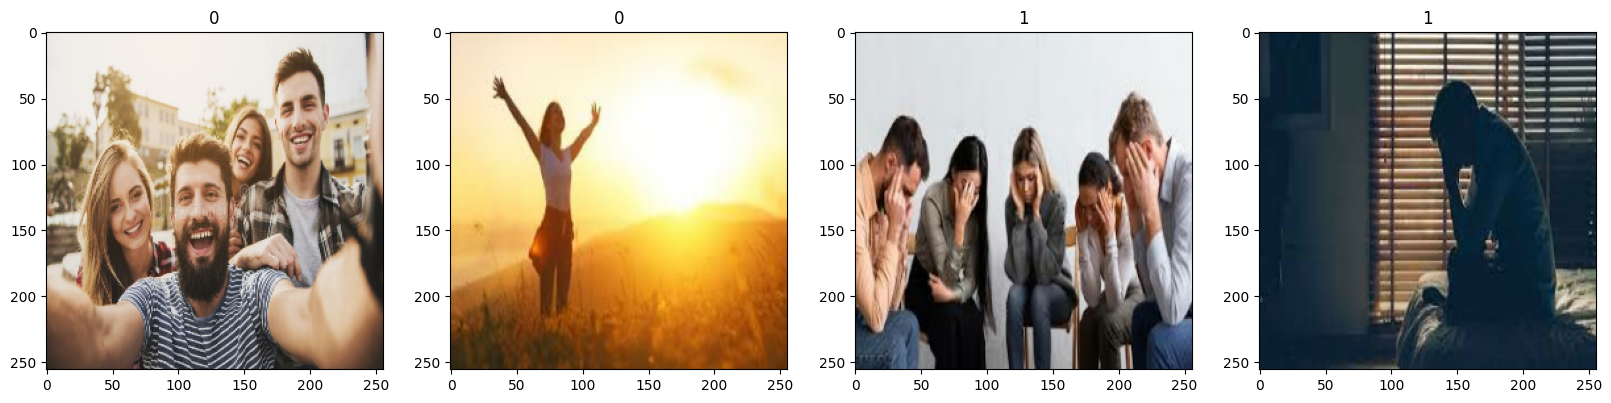

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.74686736, 0.5920879 , 0.44466147],
          [0.7543888 , 0.602742  , 0.44980085],
          [0.75281096, 0.6033088 , 0.45958945],
          ...,
          [0.4456112 , 0.3723269 , 0.3266161 ],
          [0.42205116, 0.35146293, 0.3044041 ],
          [0.43053767, 0.35994944, 0.32073376]],
 
         [[0.7269148 , 0.57397366, 0.41708028],
          [0.74742645, 0.5944853 , 0.44154412],
          [0.751371  , 0.6023514 , 0.45230547],
          ...,
          [0.43426776, 0.36367953, 0.3229473 ],
          [0.43594515, 0.36335018, 0.33015472],
          [0.42818627, 0.35458794, 0.32440257]],
 
         [[0.72389704, 0.5709559 , 0.4180147 ],
          [0.7378906 , 0.58494943, 0.42465532],
          [0.7214308 , 0.5724112 , 0.42731312],
          ...,
          [0.44534314, 0.3747549 , 0.32801777],
          [0.43822762, 0.3676394 , 0.32058057],
          [0.43585324, 0.365265  , 0.32581955]],
 
         ...,
 
         [[0.81396294, 0.7978018 , 0.78039217],
          [0.82384

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tensorflow.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
logdir='logs'

In [30]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 556ms/step - accuracy: 0.5063 - loss: 1.2724 - val_accuracy: 0.5156 - val_loss: 0.6881
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.5617 - loss: 0.6889 - val_accuracy: 0.7344 - val_loss: 0.6240
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step - accuracy: 0.6172 - loss: 0.6250 - val_accuracy: 0.7812 - val_loss: 0.5381
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.8130 - loss: 0.5358 - val_accuracy: 0.8438 - val_loss: 0.4157
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 743ms/step - accuracy: 0.8572 - loss: 0.4026 - val_accuracy: 0.8906 - val_loss: 0.3870
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.7933 - loss: 0.4286 - val_accuracy: 0.8594 - val_loss: 0.3135
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 661ms/step - accuracy: 0.8322 - loss: 0.3556 - val_accuracy: 0.9375 - val_loss: 0.2675
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 746ms/step - accuracy: 0.9020 - loss: 0.3086 - val_accuracy: 0.9375 - val_loss

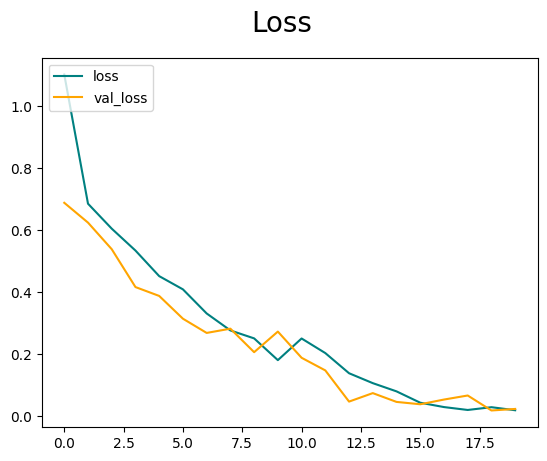

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

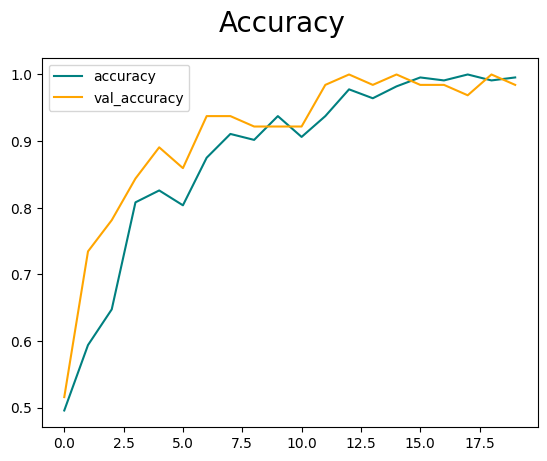

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
import cv2

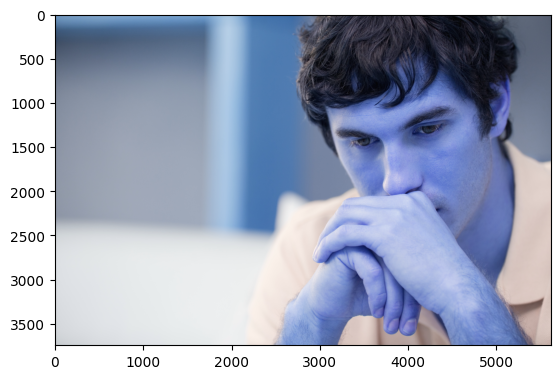

In [66]:
img = cv2.imread('ImageClassification/8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

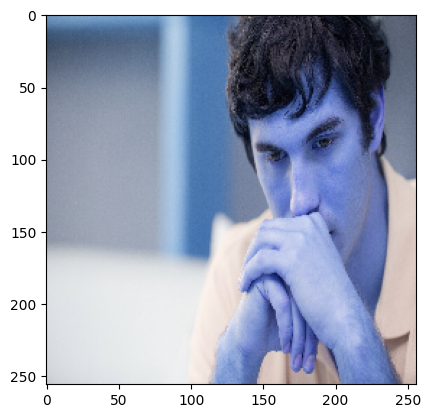

In [67]:
resize = tensorflow.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [69]:
yhat

array([[0.96857107]], dtype=float32)

In [70]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [77]:
from tensorflow.keras.models import save_model

In [79]:
keras.models.save_model(model, 'my_model.keras')